In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import math
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pandas as pd
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from collections import Counter
from matplotlib import cm

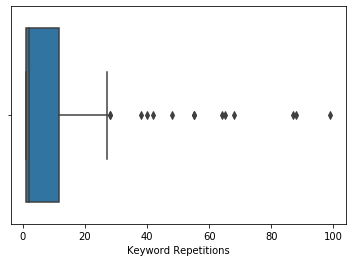

In [5]:
# the distribution of keyword repetitions of followers
df_followers = pd.read_excel('E:\\ZQ\\data science\\program\\1502股票推特\\CW2\\Apple_Tweets.xlsx',sheet_name = 'Top Users (Followers)')
sns.boxplot(df_followers['Keyword Repetitions'])
plt.show()

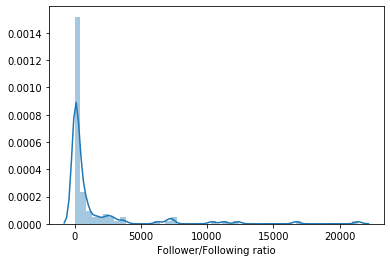

In [6]:
# the histogram of follower/following ratio of followers
sns.distplot(df_followers['Follower/Following ratio'])
plt.show()

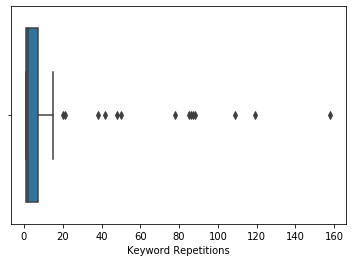

In [8]:
# the distribution of keyword repetitions of following
df_following = pd.read_excel('E:\\ZQ\\data science\\program\\1502股票推特\\CW2\\Apple_Tweets.xlsx',sheet_name = 'Top Users (Following)')
sns.boxplot(df_following['Keyword Repetitions'])
plt.show()

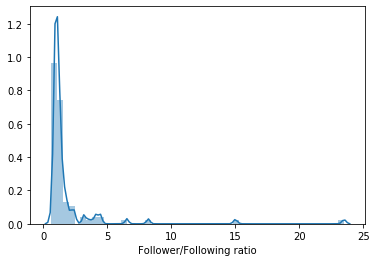

In [9]:
# the histogram of follower/following ratio of following
sns.distplot(df_following['Follower/Following ratio'])
plt.show()

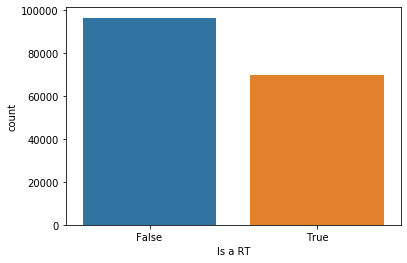

In [10]:
# the comparison of "Is a RT"
df_stream = pd.read_excel('E:\\ZQ\\data science\\program\\1502股票推特\\CW2\\Apple_Tweets.xlsx',sheet_name = 'Stream')
sns.countplot(df_stream['Is a RT'])
plt.show()

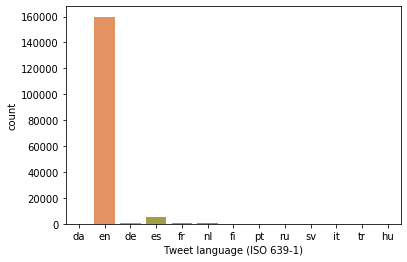

In [12]:
# language used
sns.countplot(df_stream['Tweet language (ISO 639-1)'])
plt.show()

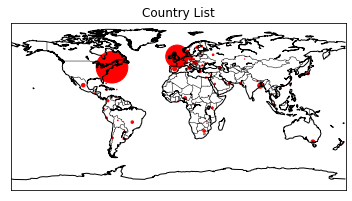

In [29]:
# draw a map with coastlines and contries initially
map = Basemap()
map.drawcoastlines()
map.drawcountries()
df_country= pd.read_excel('E:\\ZQ\\data science\\program\\1502股票推特\\CW2\\Apple_Tweets.xlsx',sheet_name = 'Country List') # 读取数据
lat = np.array(df_country['Latitude'])                        # latitude
lon = np.array(df_country['Longitude'])                        # longitude
keyword = np.array(df_country['Keyword Repetitions'],dtype=float)    # keyword
size=(keyword/np.max(keyword))*1000     
x,y = map(lon,lat)
map.scatter(x,y,s = size,c = 'red')     # draw
plt.title('Country List')
plt.show()
# bigger point meams more keywords

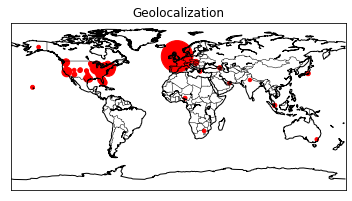

In [28]:
# draw a map with coastlines and contries initially
map = Basemap()
map.drawcoastlines()
map.drawcountries()   
df_geo= pd.read_excel('E:\\ZQ\\data science\\program\\1502股票推特\\CW2\\Apple_Tweets.xlsx',sheet_name = 'Geolocalization') # 读取数据
lat = np.array(df_geo['Latitude'])                        # latitude
lon = np.array(df_geo['Longitude'])                        # longitude
keyword = np.array(df_geo['Keyword Repetitions'],dtype=float)    # keyword
size=(keyword/np.max(keyword))*1000     
x,y = map(lon,lat)
map.scatter(x,y,s = size,c = 'red')     # draw
plt.title('Geolocalization')
plt.show()
# bigger point meams more keywords

In [19]:
# pre-process text of tweets
df = pd.read_excel('E:\\ZQ\\data science\\program\\1502股票推特\\CW2\\Apple_Tweets.xlsx',sheet_name = 'Stream',nrows = 50)
stop_words = stopwords.words('english')
for w in ['!',',','.','?',':','http','ba','https']:
            stop_words.append(w)
            
def get_wordnet_pos(tag):# justify part of speech
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
w = df['Tweet content'].str.lower().tolist()
data = []
porter_stemmer = PorterStemmer() # stemming
for x in w:
    disease_List = nltk.word_tokenize(x)
    filtered = [w for w in disease_List if(w not in stop_words)and (wordnet.synsets(w)) and ( w.isalpha())]# remove stop words
    tagged_sent = pos_tag(filtered)
    wnl = WordNetLemmatizer()
    lemmas_sent = []
    for tag in tagged_sent:
                wordnet_pos = get_wordnet_pos(tag[1]) or wordnet.NOUN
                lemmas_sent.append(wnl.lemmatize(tag[0], pos=wordnet_pos)) # lemmatisation
    data.append(lemmas_sent)

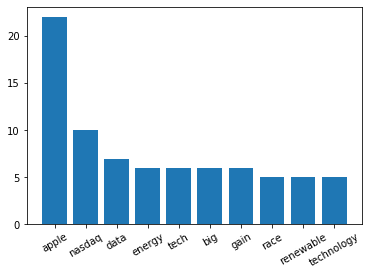

In [22]:
# the topics of tweets
word = []
for i in data:
            for j in range(0,len(i)):
                        word.append(i[j])
d = Counter(word) # the dictionary of word frequency

def draw_from_dict(dicdata,RANGE, heng=0):
    #dicdata：my dictionary
    #RANGE：the length of dictionary
    #heng=0 means it draws vertically. heng=1 means it draws horizontally.
    by_value = sorted(dicdata.items(),key = lambda item:item[1],reverse=True)
    x = []
    y = []
    for d in by_value:
        x.append(d[0])
        y.append(d[1])
    if heng == 0:
        plt.bar(x[0:RANGE], y[0:RANGE])
        plt.xticks(rotation = 30)# inc case labels are overlapped
        plt.show()
        return 
    elif heng == 1:
        plt.barh(x[0:RANGE], y[0:RANGE])
        plt.xticks(rotation = 30)# inc case labels are overlapped
        plt.show()
        return 
    else:
        return "heng is only 0 or 1!"
draw_from_dict(d,10, heng=0) 